### <center><h1>Loan Approval Prediction</h1></center>


## Project Title: Loan Approval Prediction

## Introduction:
Welcome to the Loan Approval Prediction project! In this project, we will analyze a dataset containing information about loan applicants to predict whether a loan application will be approved or not. By exploring various features and using machine learning algorithms, we aim to build a predictive model that can assist in making loan approval decisions.



## Dataset and Features:
The dataset used for this project consists of the following columns:

1. Loan_ID: Unique identifier for each loan application
2. Gender: Gender of the applicant (Male/Female)
3. Married: Marital status of the applicant (Yes/No)
4. Dependents: Number of dependents the applicant has
5. Education: Education level of the applicant (Graduate/Not Graduate)
6. Self_Employed: Indicates whether the applicant is self-employed (Yes/No)
7. ApplicantIncome: Income of the applicant
8. CoapplicantIncome: Income of the co-applicant (if any)
9. LoanAmount: Loan amount requested by the applicant
10. Loan_Amount_Term: Term (in months) of the loan
11. Credit_History: Credit history of the applicant (1: Good, 0: Bad)
12. Property_Area: Area type of the property (Urban/Semiurban/Rural)
13. Loan_Status: Approval status of the loan (Y: Approved, N: Not Approved)

## Objective:
The main objective of this project is to develop a machine learning model that can accurately predict whether a loan application will be approved or not based on the given features. This can help banks and financial institutions streamline their loan approval process and make informed decisions.

Now, let's dive into the data exploration, analysis, and prediction modeling to achieve our objective!


In [1]:
#Import Preprocessing Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# import Sickit-learn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 1) Data Preprocessing & EDA 

# > Initial data preparation

## 1.1) Data Loading

In [2]:
loan = pd.read_csv('../Data/train_ctrUa4K.csv')

In [3]:
loans = loan.copy()
loans.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [4]:
loan.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# shape of data
loans.shape

(614, 13)

In [6]:
# columns type of Dataset
loans.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 1.2)  Data Cleansing 

- ### Uniform columns name and  values 

In [7]:
# Uniform name of columns 
loans.columns = loans.columns.str.lower().str.replace(" ","_")
loans.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [8]:
# String Columns  
string_columns = list(loans.dtypes[loans.dtypes == 'object'].index)

# drop Loan_ID from String columns
string_columns = [
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

In [9]:
# Uniform Values of Dataset 
for col in string_columns:
    loans[col] = loans[col].str.lower().str.replace(" ","_")
display(loans.head())

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,LP001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,LP001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,LP001006,male,yes,0,not_graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,LP001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [10]:
# check unique values to spot abnormal values

for i in string_columns:
    print(f'Name of column: {i}')
    print(f'unique values : {loans[i].nunique()}')
    print(f'{loans[i].unique()}\n')

Name of column: gender
unique values : 2
['male' 'female' nan]

Name of column: married
unique values : 2
['no' 'yes' nan]

Name of column: dependents
unique values : 4
['0' '1' '2' '3+' nan]

Name of column: education
unique values : 2
['graduate' 'not_graduate']

Name of column: self_employed
unique values : 2
['no' 'yes' nan]

Name of column: property_area
unique values : 3
['urban' 'rural' 'semiurban']

Name of column: loan_status
unique values : 2
['y' 'n']



# 1.2.2) Dealing with outliers

In [11]:
# Replacing abnormal value of dependents column
loans.dependents = loans.dependents.replace('3+',4)

# 1.2.3) Data Casting 

In [12]:
# columns casting from object to numeric  
loans.dependents = pd.to_numeric(loans.dependents)
loans.loan_status = ((loans.loan_status == 'y').astype(int))


In [14]:
loans.loan_status.value_counts()

loan_status
1    422
0    192
Name: count, dtype: int64

In [15]:
# data types
loans.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status            int32
dtype: object

# 1.2.4) Dealing with missing values

In [19]:
# check the missing values per each columns 
print(loans.isnull().sum())


loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [17]:
# Define Categorical and numerical columns that contains missing values
categorical = ['gender', 'married','dependents','education',
       'self_employed','credit_history', 'property_area','loan_status']

numerical = ['applicantincome', 'coapplicantincome', 'loanamount','loan_amount_term']

# Filing missing values for categorical data
for col in categorical:
    loans[col].fillna(loans[col].mode().iloc[0], inplace =True)
    
# Filing missing values for numerical data
for col in numerical:
    loans[col].fillna(loans[col].mean(), inplace=True)

C:\Users\kanch\AppData\Local\Temp\ipykernel_2888\2277635878.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loans[col].fillna(loans[col].mode().iloc[0], inplace =True)
C:\Users\kanch\AppData\Local\Temp\ipykernel_2888\2277635878.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [13]:
# No missing values now 
loans.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

# Explotary Data Analysis

In [14]:
loans.loan_status.value_counts(normalize=True)

loan_status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

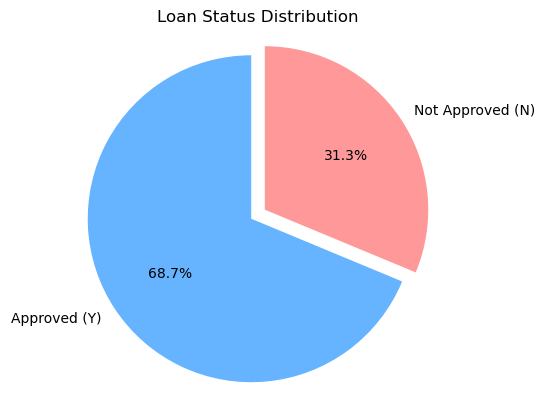

In [15]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Approved (Y)', 'Not Approved (N)']
sizes = [68.73, 31.27]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Explode the first slice

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90)

# Add a title
plt.title('Loan Status Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


- The dataset contains two categories for loan_status: 1 and 0.
- The value count shows that approximately 68.73% of the loans in the dataset have a loan_status of 1, indicating approved loans, while approximately 31.27% have a loan_status of 0, indicating not approved loans.

# 2) Feature Importance 

In [17]:
female_yes = loans[loans.gender == 'female'].loan_status.mean()
print('gender == female:', round(female_yes, 3))

male_yes = loans[loans.gender == 'male'].loan_status.mean()
print('gender == male:', round(male_yes, 3))

gender == female: 0.67
gender == male: 0.693


### Risk ratio

In [19]:
global_mean = loans.loan_status.mean()
global_mean

0.6872964169381107

In [21]:
# preparing categorical and numberical data for analysis
categorical_cols = ['credit_history', 'property_area', 'married', 'education', 'dependents',
       'gender', 'self_employed']
numerical_cols = ['applicantincome', 'coapplicantincome', 'loanamount','loan_amount_term']
# number of unique values per categorical datasset
loans[categorical_cols].nunique()

credit_history    2
property_area     3
married           2
education         2
dependents        4
gender            2
self_employed     2
dtype: int64

# 2.1) Feature importance: Status rate and risk ratio 

In [22]:
# import IPthon library to display 
from IPython.display import display

In [23]:
# Grouping Categorical Columnns by mean and count per loan status and check the status rate and risk ration for each group.
for col in categorical_cols:
    df_group = loans.groupby(by=col).loan_status.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,count,diff,risk
credit_history,,,,
0.0,0.078652,89,-0.608645,0.114436
1.0,0.795789,475,0.108493,1.157855


,mean,count,diff,risk
property_area,,,,
rural,0.614525,179,-0.072771,0.894120
semiurban,0.768240,233,0.080944,1.117771
urban,0.658416,202,-0.028881,0.957979


,mean,count,diff,risk
married,,,,
no,0.629108,213,-0.058188,0.915337
yes,0.716080,398,0.028784,1.041880


,mean,count,diff,risk
education,,,,
graduate,0.708333,480,0.021037,1.030608
not_graduate,0.611940,134,-0.075356,0.890359


,mean,count,diff,risk
dependents,,,,
0.0,0.689855,345,0.002559,1.003723
1.0,0.647059,102,-0.040238,0.941455
2.0,0.752475,101,0.065179,1.094834
4.0,0.647059,51,-0.040238,0.941455


,mean,count,diff,risk
gender,,,,
female,0.669643,112,-0.017654,0.974314
male,0.693252,489,0.005955,1.008665


,mean,count,diff,risk
self_employed,,,,
no,0.686000,500,-0.001296,0.998114
yes,0.682927,82,-0.004370,0.993642


Concllusion:

- Customers with a credit history of 1.0 (good credit history) have a higher loan approval rate compared to those with no credit history.
- Customers in semiurban and urban areas have a higher loan approval rate compared to rural areas.
- Married individuals, graduates, and customers with 2 dependents have a higher loan approval rate.
- Gender and self-employment status have minimal impact on loan approval.
- Consider focusing on customers with a good credit history, targeting semiurban and urban areas, and giving preference to married individuals and graduates for higher loan approval rates.


Recommendations:
- Focus on customers with a credit history of 1.0, as they have a significantly higher loan approval rate.
- Consider targeting customers in semiurban and urban areas, as they have a higher loan approval rate.
- Give preference to married individuals and graduates, as they have a higher loan approval rate.
- Evaluate the risk associated with customers who have no credit history (0.0) or reside in rural areas.
- Further analyze the factors influencing loan approval for customers with dependents and explore strategies to increase their loan approval rate.
- Gender and self-employment status do not seem to have a significant impact on loan approval, but further analysis can be done to explore any potential correlations.

These conclusions and recommendations are based on the analysis of the provided categorical columns and their relationship with loan approval. It is important to consider other factors and conduct further analysis to gain a comprehensive understanding of the loan approval process.

# -----------------------

In [24]:
loans_analysis =  loans[['gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status']]
loans_analysis['total'] =loans_analysis.applicantincome + loans_analysis.coapplicantincome

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
155,LP001536,male,yes,4.0,graduate,no,39999,0.0,600.0,180.0,0.0,semiurban,1


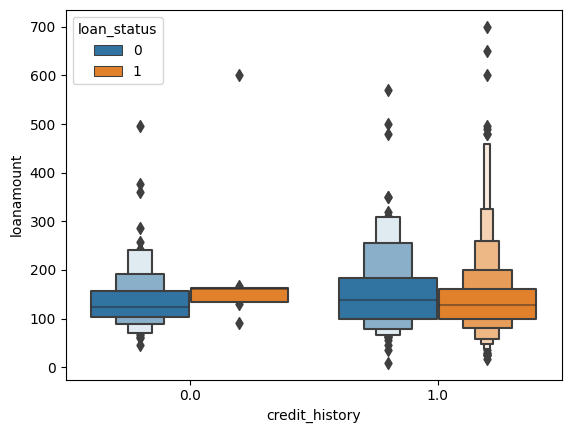

In [185]:
area_credhistory = loans.copy()
area_credhistory = loans_analysis[(loans_analysis.loanamount > 400) & (area_credhistory.credit_history == 0)]
# sns.boxenplot(data=area_credhistory, x='credit_history',y='property_area',hue='loan_status')
# loans.pivot_table(values='loan_status', index=['credit_history','property_area'], aggfunc='sum')
sns.boxenplot(data=loans, x= 'credit_history',y='loanamount',hue='loan_status')
loans[(loans.loanamount == 600)& (loans.credit_history == 0)]

### **1st insight**
 
 
> Altough Credit History is the most important feature for loans to be approved , but one oof the applicants income is very high we give approval . we need to investigate futher ... 



avg income of approval :
 2.333449521150979


C:\Users\kanch\AppData\Local\Temp\ipykernel_2500\1346467030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amount_income['avg'] = amount_income.loanamount  / amount_income.total * 100


<Axes: xlabel='avg', ylabel='Count'>

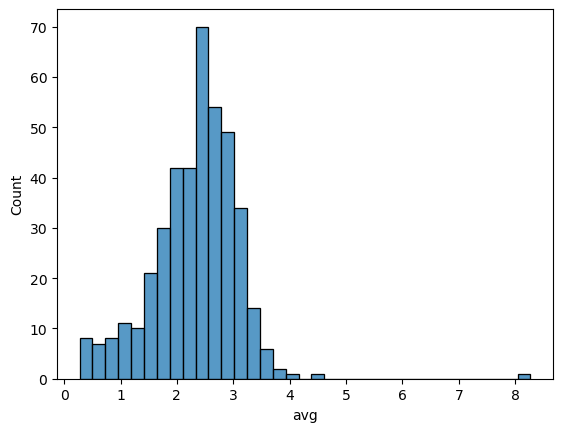

In [25]:
amount_income = loans_analysis[(loans_analysis.loan_status == 1)]
amount_income['avg'] = amount_income.loanamount  / amount_income.total * 100
print(f'avg income of approval :\n {amount_income["avg"].mean()}')
amount_income[['avg','loanamount','applicantincome']].sort_values(by='loanamount', ascending= False).describe()
sns.histplot(amount_income.avg)

### 2nd insight
> TO get approval,  loan amount on average is 2.34 of Total income (applicant income and Coapplicant income)  . Based on data we have , we don't give income more than 4 % of total income.

In [26]:
property_married = loans_analysis.copy()

loans[(loans_analysis.credit_history == 0)& (loans_analysis.dependents == 4)&(loans.loan_status == 1)]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
155,LP001536,male,yes,4.0,graduate,no,39999,0.0,600.0,180.0,0.0,semiurban,1
267,LP001882,male,yes,4.0,graduate,no,4333,1811.0,160.0,360.0,0.0,urban,1


### 3rd insight

> ### we should investigate about these 2 loan IDs if it should be approved or not as :
> - Especially Loan ID (LP001882) the loan amount .
> - Loan ID (LP001882) higher than applicant income plus applicant has bad credit history in addition not educated which all tends to not giving loan.

In [27]:
credit_col = loans_analysis[(loans_analysis.credit_history == 0)&(loans_analysis.married == 'no')&(loans_analysis.education == 'graduate')& (loans_analysis.loan_status ==1 )] 
# pd.crosstab([credit_col.education,credit_col.married],
#             credit_col.loan_status, aggfunc=['count'], values= 'loan_status').plot(kind='barh')
credit_col

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,total
122,female,no,0.0,graduate,no,2137,8980.0,137.0,360.0,0.0,semiurban,1,11117.0
201,male,no,2.0,graduate,no,4923,0.0,166.0,360.0,0.0,semiurban,1,4923.0
326,male,no,0.0,graduate,no,4917,0.0,130.0,360.0,0.0,rural,1,4917.0


### 4th insight
> - applicants whose credit history is bad and not graduated also not married their loan got approved because the ration between loan amount / Total income is very small 

In [28]:
pd.crosstab(loans_analysis.property_area,
            loans_analysis.loan_status, aggfunc=['count'], values= 'loan_status')

count     
loan_status       0    1
property_area           
rural            69  110
semiurban        54  179
urban            69  133

# -----------------------

In [29]:
loans[(loans.loan_status == 0) & (loans.loanamount < 300) & (loans.credit_history == 0 & (loans.education == 0))].head(50)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
7,LP001014,male,yes,4.0,graduate,no,3036,2504.0,158.0,360.0,0.0,semiurban,0
17,LP001036,female,no,0.0,graduate,no,3510,0.0,76.0,360.0,0.0,urban,0
20,LP001043,male,yes,0.0,not_graduate,no,7660,0.0,104.0,360.0,0.0,urban,0
22,LP001047,male,yes,0.0,not_graduate,no,2600,1911.0,116.0,360.0,0.0,semiurban,0
23,LP001050,NaN,yes,2.0,not_graduate,no,3365,1917.0,112.0,360.0,0.0,rural,0
36,LP001109,male,yes,0.0,graduate,no,1828,1330.0,100.0,NaN,0.0,urban,0
48,LP001146,female,yes,0.0,graduate,no,2645,3440.0,120.0,360.0,0.0,urban,0
54,LP001186,female,yes,1.0,graduate,yes,11500,0.0,286.0,360.0,0.0,urban,0
62,LP001207,male,yes,0.0,not_graduate,yes,2609,3449.0,165.0,180.0,0.0,rural,0
64,LP001222,female,no,0.0,graduate,no,4166,0.0,116.0,360.0,0.0,semiurban,0


In [30]:
loans[(loans.applicantincome < 100 )&(loans.loan_amount_term < 200 )&(loans.loan_status == 0 ) ].head(50)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status


In [31]:
loans[(loans.applicantincome  < 200)& (loans.loanamount > 200)]  
loans[(loans.credit_history  ==  0)& (loans.loan_status == 1)]  

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
122,LP001431,female,no,0.0,graduate,no,2137,8980.0,137.0,360.0,0.0,semiurban,1
155,LP001536,male,yes,4.0,graduate,no,39999,0.0,600.0,180.0,0.0,semiurban,1
201,LP001677,male,no,2.0,graduate,no,4923,0.0,166.0,360.0,0.0,semiurban,1
267,LP001882,male,yes,4.0,graduate,no,4333,1811.0,160.0,360.0,0.0,urban,1
326,LP002068,male,no,0.0,graduate,no,4917,0.0,130.0,360.0,0.0,rural,1
453,LP002449,male,yes,0.0,graduate,no,2483,2466.0,90.0,180.0,0.0,rural,1
527,LP002706,male,yes,1.0,not_graduate,no,5285,1430.0,161.0,360.0,0.0,semiurban,1


<Axes: xlabel='applicantincome', ylabel='loanamount'>

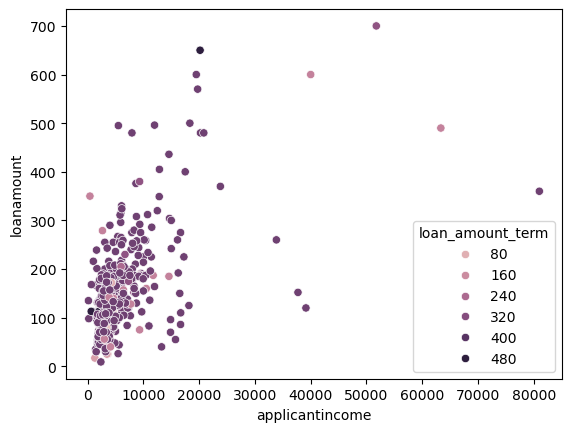

In [32]:
sns.scatterplot(x='applicantincome', y='loanamount', data=loans , hue = 'loan_amount_term')

In [33]:
loans[(loans.loan_status == 1) & (loans.credit_history == 0)]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
122,LP001431,female,no,0.0,graduate,no,2137,8980.0,137.0,360.0,0.0,semiurban,1
155,LP001536,male,yes,4.0,graduate,no,39999,0.0,600.0,180.0,0.0,semiurban,1
201,LP001677,male,no,2.0,graduate,no,4923,0.0,166.0,360.0,0.0,semiurban,1
267,LP001882,male,yes,4.0,graduate,no,4333,1811.0,160.0,360.0,0.0,urban,1
326,LP002068,male,no,0.0,graduate,no,4917,0.0,130.0,360.0,0.0,rural,1
453,LP002449,male,yes,0.0,graduate,no,2483,2466.0,90.0,180.0,0.0,rural,1
527,LP002706,male,yes,1.0,not_graduate,no,5285,1430.0,161.0,360.0,0.0,semiurban,1


In [34]:
pd.crosstab(loans.loan_status,loans.credit_history)

credit_history,0.0,1.0
loan_status,,
0,82,97
1,7,378


In [35]:
hist_status = loans[(loans.credit_history == 1) &(loans.loan_status == 0) ]
pd.crosstab(hist_status.loan_amount_term, hist_status.dependents )

dependents,0.0,1.0,2.0,4.0
loan_amount_term,,,,
36.0,1,1,0,0
84.0,0,1,0,0
180.0,3,1,0,2
240.0,0,0,1,0
300.0,2,0,0,0
360.0,50,14,10,5
480.0,4,0,1,0


# -------------------

In [197]:
# COoments here
# Multivariant Exploriation 

# 2.2) Feature importance: Mutual Information 

In [37]:
# import mutual_info_score to check the importance of features for categorical dataset
from sklearn.metrics import mutual_info_score

In [38]:
# how much we konw abount Loan Status 
# create this function because apply function takes onlyl one argumnet and mutual_info_score takes two arguments. 
def calculate_mi(series):
    return mutual_info_score(series, loans.loan_status)

# appened function we created to apply function >> 
df_mi = loans[categorical_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head(10))

ValueError: Input contains NaN.

### Here we check how much we know about loan Status by checking the mean of the relation between the categorical features and Loan Status :
-  the higher of mutual_info_score the more likely to take a loan. 
-  so here Credit History is the most important feature to determine if we will give a loan or not.
-  then property area is less important than Credit  History and more important than Married Status and So on.
-  the least important feature of our features is Self Employed and Gender we do not focus more on Gender and if he is self Employed or not.


# 2.3) Feature importance: Correlation 

- #### Correlaion Coefficient 

In [200]:
# Correation Coefficient between Numerical Featues and Loan Status
loans[numerical_cols].corrwith(loans.loan_status).sort_values(ascending=True).to_frame('correlation')


,correlation
coapplicantincome,-0.059187
loanamount,-0.036416
loan_amount_term,-0.020974
applicantincome,-0.004710


In [201]:
loans[numerical_cols].corr()
# statsmodel p-value

,applicantincome,coapplicantincome,loanamount,loan_amount_term
applicantincome,1.000000,-0.116605,0.565620,-0.045242
coapplicantincome,-0.116605,1.000000,0.187828,-0.059675
loanamount,0.565620,0.187828,1.000000,0.038801
loan_amount_term,-0.045242,-0.059675,0.038801,1.000000


## Correlation Coefficient is between -1 to 1 

- #### let's say: 
- #### from 0.0 to 0.2 or 0.0 to -0.2 it's low correlation 
- #### from 0.2 to 0.5 or -0.2 to -0.5 it's moderate correlation 
- #### from 0.6 to 1.0 or -0.6 to -1.0 it's moderate correlation 
## so here negative correlation  :
- #### the lower the correlation the higher percentage to give a loan
- #### so here Credit History is the most important feature then laon amount and BTW it's all low correlation.
 

In [202]:
loans.groupby(by='loan_status')[numerical].mean()


,applicantincome,coapplicantincome,loanamount,loan_amount_term
loan_status,,,,
0,5446.078125,1877.807292,150.945488,344.000000
1,5384.068720,1504.516398,144.349606,341.090047


# 3) Label encoding

 - #### encode categorical features

In [203]:
from sklearn.preprocessing import LabelEncoder
#Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to categorical columns
loans['gender'] = label_encoder.fit_transform(loans['gender'])
loans['self_employed'] = label_encoder.fit_transform(loans['self_employed'])
loans['applicantincome'] = label_encoder.fit_transform(loans['applicantincome'])
loans['property_area'] = label_encoder.fit_transform(loans['property_area'])
loans['education'] = label_encoder.fit_transform(loans['education'])
loans['married'] = label_encoder.fit_transform(loans['married'])


In [204]:
X_values = loans[categorical_cols+numerical_cols]

#  feature Scaling

In [205]:
# determine X , y 
x = X_values
y = loans.loan_status

In [206]:
x

,credit_history,property_area,married,education,dependents,gender,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term
0,1.0,2,0,0,0.0,1,0,376,0.0,146.412162,360.0
1,1.0,0,1,0,1.0,1,0,306,1508.0,128.000000,360.0
2,1.0,2,1,0,0.0,1,1,139,0.0,66.000000,360.0
3,1.0,2,1,1,0.0,1,0,90,2358.0,120.000000,360.0
4,1.0,2,0,0,0.0,1,0,381,0.0,141.000000,360.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0.0,0,0,125,0.0,71.000000,360.0
610,1.0,0,1,0,4.0,1,0,275,0.0,40.000000,180.0
611,1.0,2,1,0,1.0,1,0,431,240.0,253.000000,360.0
612,1.0,2,1,0,2.0,1,0,422,0.0,187.000000,360.0


In [207]:
Scaled_cols = ['applicantincome','coapplicantincome','loanamount','loan_amount_term']
# perform MinMaxScaler on the selected collumns
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x[Scaled_cols]=st.fit_transform(x[Scaled_cols])

# print the normalized dataset 
print('Normalized Dataset: ')
print(x.head())


Normalized Dataset: 
   credit_history  property_area  married  education  dependents  gender  \
0             1.0              2        0          0         0.0       1   
1             1.0              0        1          0         1.0       1   
2             1.0              2        1          0         0.0       1   
3             1.0              2        1          1         0.0       1   
4             1.0              2        0          0         0.0       1   

   self_employed  applicantincome  coapplicantincome  loanamount  \
0              0         0.898633          -0.554487    0.000000   
1              0         0.410559          -0.038732   -0.219273   
2              1        -0.753846          -0.554487   -0.957641   
3              0        -1.095498           0.251980   -0.314547   
4              0         0.933495          -0.554487   -0.064454   

   loan_amount_term  
0          0.279851  
1          0.279851  
2          0.279851  
3          0.279851  
4  

C:\Users\Moga\AppData\Local\Temp\ipykernel_10064\2160872824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[Scaled_cols]=st.fit_transform(x[Scaled_cols])


# 4) Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [209]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# 5) LogisticRegression

Confusion Matrix is : 
 [[ 26  25]
 [ 21 113]]


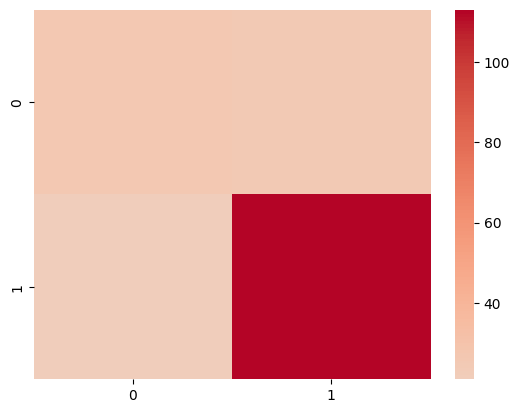

In [210]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

In [211]:
LR = LogisticRegression(solver='liblinear', random_state=1,class_weight='balanced' )
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        51
           1       0.83      0.90      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.71      0.72       185
weighted avg       0.78      0.79      0.79       185

accuracy is 0.7945945945945946


Confusion Matrix is : 
 [[ 26  25]
 [ 13 121]]


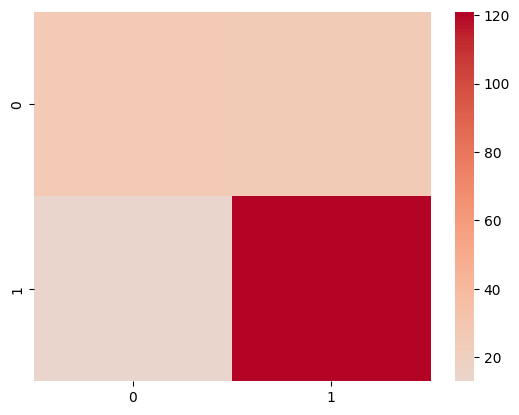

In [212]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

In [213]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create an instance of the RandomOverSampler
oversampler = RandomOverSampler(random_state=1)

# Apply oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create an instance of LogisticRegression
LR = LogisticRegression(solver='liblinear', random_state=1,class_weight='balanced')

# Fit the logistic regression model on the resampled data
LR.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_predict = LR.predict(X_test)

# Print classification report
print(classification_report(y_test, y_predict))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy:', accuracy)

              precision    recall  f1-score   support

           0       0.55      0.51      0.53        51
           1       0.82      0.84      0.83       134

    accuracy                           0.75       185
   macro avg       0.69      0.68      0.68       185
weighted avg       0.75      0.75      0.75       185

Accuracy: 0.7513513513513513


Confusion Matrix is : 
 [[ 26  25]
 [ 21 113]]


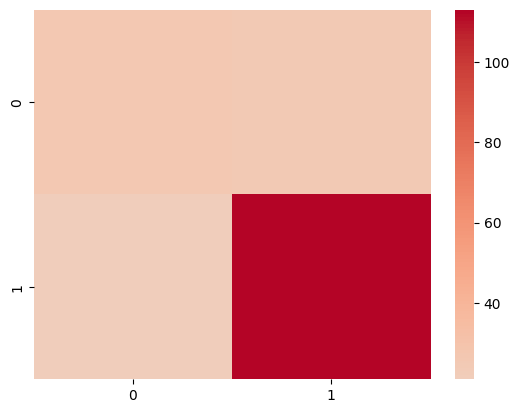

In [214]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

In [215]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.head(5)

,y_test,prediction
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1


# Adjusted Logistic Regression

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Logistic Regression classifier
LRclassifier = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=LRclassifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Logistic Regression classifier with the best parameters
LRclassifier_best = LogisticRegression(**best_params, class_weight='balanced')

# Fit the classifier to the training data
LRclassifier_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LRclassifier_best.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        51
           1       0.83      0.87      0.85       134

    accuracy                           0.77       185
   macro avg       0.71      0.70      0.70       185
weighted avg       0.77      0.77      0.77       185

[[ 27  24]
 [ 18 116]]


C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\skle

In [217]:
accuracy

0.772972972972973

# SVC

In [218]:
#Support Vector Classifier 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

SVCclassifier = SVC(kernel='rbf', max_iter=1000,class_weight='balanced')
SVCclassifier.fit(X_train, y_train)


y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        51
           1       0.81      0.92      0.86       134

    accuracy                           0.78       185
   macro avg       0.74      0.67      0.69       185
weighted avg       0.77      0.78      0.77       185

[[ 22  29]
 [ 11 123]]


In [219]:
from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)

In [220]:
SVCAcc

0.7837837837837838

# RandomForestClassifier

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Random Forest classifier
RFclassifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
RFclassifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = RFclassifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
RFacc = accuracy_score(y_pred, y_test)

              precision    recall  f1-score   support

           0       0.68      0.45      0.54        51
           1       0.81      0.92      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.78      0.79      0.77       185

[[ 23  28]
 [ 11 123]]


In [222]:
RFacc

0.7891891891891892

Confusion Matrix is : 
 [[ 26  25]
 [ 21 113]]


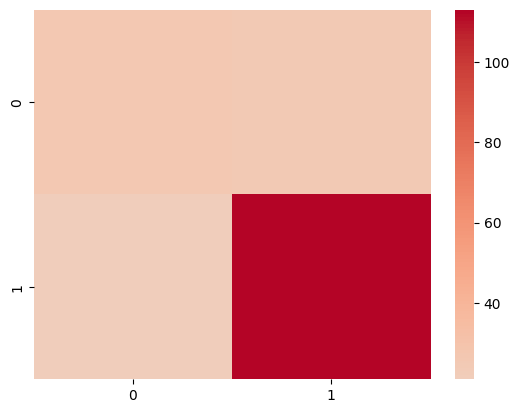

In [223]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

# XGboost

In [224]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create an XGBoost classifier
XGBclassifier = XGBClassifier()

# Fit the classifier to the training data
XGBclassifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = XGBclassifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
XGBacc = accuracy_score(y_pred, y_test)

              precision    recall  f1-score   support

           0       0.70      0.55      0.62        51
           1       0.84      0.91      0.87       134

    accuracy                           0.81       185
   macro avg       0.77      0.73      0.74       185
weighted avg       0.80      0.81      0.80       185

[[ 28  23]
 [ 12 122]]


In [225]:
XGBacc

0.8108108108108109

Confusion Matrix is : 
 [[ 26  25]
 [ 21 113]]


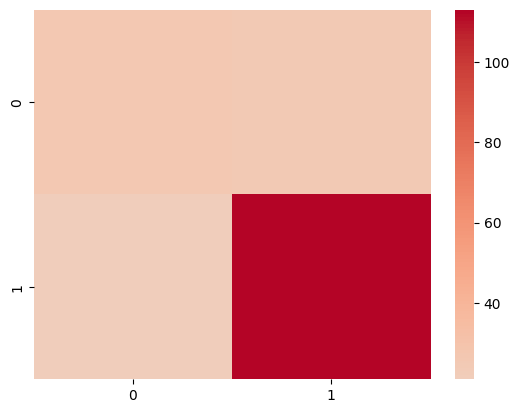

In [226]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

# Adjusted xgboost

In [227]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


XGBclassifier = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=XGBclassifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new XGBoost classifier with the best parameters
XGBclassifier_best = XGBClassifier(**best_params)

# Fit the classifier to the training data
XGBclassifier_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = XGBclassifier_best.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy 

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

[[ 21  30]
 [  2 132]]


0.827027027027027

In [228]:
accuracy

0.827027027027027

Confusion Matrix is : 
 [[ 26  25]
 [ 21 113]]


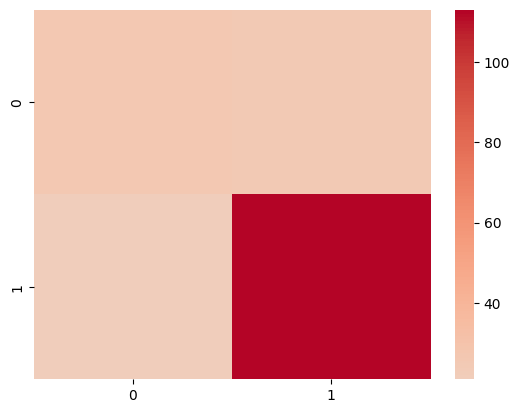

In [229]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

# Clustering

In [230]:
# import KMeans
from sklearn.cluster import KMeans

In [231]:
loans['totalincome'] = loans.applicantincome + loans.coapplicantincome
# Select the features for clustering
features = [ 'married', 'education','loanamount', 'loan_amount_term',
            'credit_history', 'loan_status','totalincome']

In [232]:
# Extract the selected features from the DataFrame
X_cluster = loans[features]

C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

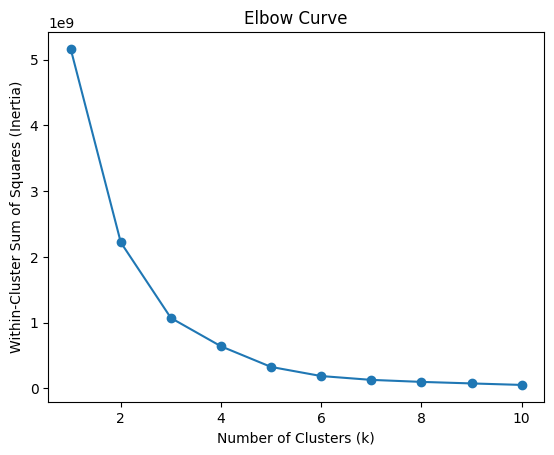

In [233]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve')
plt.show()

In [234]:
# Create a K-means clustering object
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-means model to the data
kmeans.fit(X_cluster)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

C:\Users\Moga\anaconda3\envs\sports_wear\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          married  education  loanamount  loan_amount_term  credit_history  \
Cluster                                                                      
0        0.526316   0.203947  141.326836           339.000        0.858553   
1        0.250000   0.000000  195.500000           315.000        1.000000   
2        0.792000   0.272000  135.418838           348.432        0.852000   
3        0.750000   0.071429  219.589286           331.500        0.839286   

         loan_status   totalincome  
Cluster                             
0           0.671053    377.091842  
1           0.250000  28906.250000  
2           0.716000   2371.476000  
3           0.678571   5786.517857  


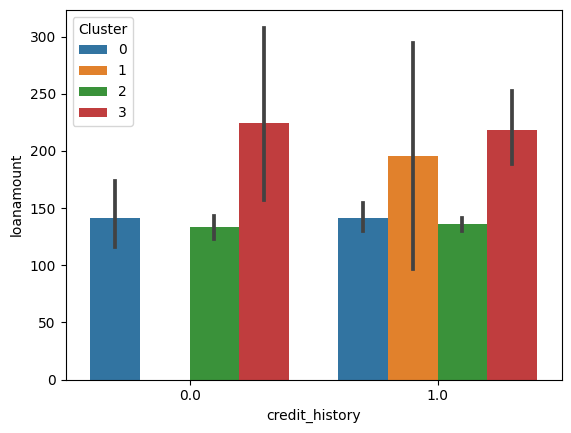

In [235]:
# Assign cluster labels to the original dataset
loans['Cluster'] = cluster_labels

# Perform further analysis or visualization based on the clusters
# Example: Calculate cluster statistics
cluster_stats = loans.groupby('Cluster')[features].mean()
print(cluster_stats)

# Example: Visualize the clusters
sns.barplot(y=loans['loanamount'], x=(loans['credit_history']  ),data=loans, hue=loans['Cluster'])
# plt.xlabel('loanamount')
# plt.ylabel('loan_sta')
# plt.title('Clustering Results')
plt.show()

### **Overall Conclusion:**

In this loan approval prediction project, we performed exploratory data analysis, feature importance analysis, and built machine learning models to predict loan approval. Here are the key findings and recommendations based on the analysis:

1. Exploratory Data Analysis:
   - The dataset consists of various features such as gender, marital status, dependents, education, income, loan amount, credit history, property area, and loan status.
   - Approximately 68.73% of the loans in the dataset were approved (loan status = 1), while 31.27% were not approved (loan status = 0).
   - Credit history, property area, marital status, education, and dependents showed variations in loan approval rates.

2. Feature Importance:
   - Credit history was found to be the most important feature influencing loan approval, with customers having a good credit history (credit_history = 1) having a higher approval rate.
   - Property area, marital status, and education were also found to be significant factors affecting loan approval.
   - Gender and self-employment status had minimal impact on loan approval.

3. Loan Approval Insights:
   - Customers with a good credit history (credit_history = 1) had a higher chance of loan approval.
   - Applicants in semiurban and urban areas had higher loan approval rates compared to those in rural areas.
   - Married individuals and graduates had higher loan approval rates.
   - Income level and loan amount played important roles in loan approval decisions.

4. Machine Learning Models:
   - Logistic Regression, Support Vector Classifier (SVC), Random Forest Classifier, and XGBoost Classifier were trained and evaluated for loan approval prediction.
   - The models achieved varying levels of accuracy, with Logistic Regression and XGBoost Classifier performing relatively well.
   - Adjustments and hyperparameter tuning were applied to improve model performance.

### Recommendations:
   - Consider the credit history of loan applicants as the most important factor in loan approval decisions. Give preference to applicants with a good credit history.
   - Focus on customers in semiurban and urban areas, as they tend to have higher loan approval rates.
   - Pay attention to the marital status and education level of applicants, as these factors also influence loan approval.
   - Evaluate the income level and loan amount carefully, ensuring that the loan amount is within a reasonable percentage of the total income (e.g., not more than 4%).
   - Further analyze and explore the impact of other factors such as dependents, property area, and employment type to gain more insights into loan approval decisions.

